In [7]:
import os 
import numpy as np
import pickle
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
data_path = '../../../data_set/模型訓練資料/train/'
save_path = '../../../data_set/模型訓練資料/save/'

In [4]:
def find_label(img):
    img = img.split('.')[0]
    label = img.split('_')[1]
    return label

In [5]:
path = '../../../data_set/模型訓練資料/train/'

In [6]:
label = []
for img in os.listdir(path):
    label.append(find_label(img))

In [8]:
import pandas as pd

In [48]:
df = pd.read_table('../../../data_set/training data dic.txt',header=0)

In [49]:
ans = list(df['宋'])

In [50]:
ans.append('宋')

In [53]:
len(set(label))

800

In [54]:
len(ans)

800

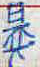

In [265]:
Image.open(img_path).rotate(180)

In [255]:
from PIL import Image

def changeColor(image_file):

    im = Image.open(image_file)
    data = np.array(im)

    #r1, g1, b1 = 55, 55, 0 # Original value
    #r2, g2, b2 = 123, 57, 222 # Value that we want to replace it with

    #red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    #mask = (red == r1) & (green == g1) & (blue == b1)
    #data[:,:,:3][mask] = [r2, g2, b2]
    
    #data[:,:,2] = 20
    
    im = Image.fromarray(data)
    
    return im

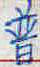

In [256]:
changeColor(img_path)

In [14]:
import numpy as np
import pickle
import os
from PIL import Image
"""Script to preprocess the omniglot dataset and pickle it into an array that's easy
    to index my character type"""

data_path = '../../../data_set/模型訓練資料'
train_folder = os.path.join(data_path, 'format_train')

save_path = os.path.join(data_path, 'save')


def loadimgs(path, train_prob, n=0):

    X_train = []
    y_train = []
    X_val = []
    y_val = []
    cat_dict_train = {}
    cat_dict_val = {}
    lang_dict_train = {}
    lang_dict_val = {}
    curr_y = 0
    count_y = 0
    # we load every word seperately so we can isolate them later
    cut_point = int(len(os.listdir(path)) * train_prob)

    for word in os.listdir(
            path)[:cut_point]:  # path is the format training set
        print("loading word_train: " + word)
        lang_dict_train[word] = [count_y, None]
        word_path = os.path.join(path, word)
        # every letter/category has it's own column in the array, so  load seperately
        cat_dict_train[curr_y] = [word]
        for num, filename in enumerate(os.listdir(word_path)):

            # add train val cut point
            image_path = os.path.join(word_path, filename)
            image = np.array(Image.open(image_path).resize((96, 96)))

            y_train.append(curr_y)
            X_train.append(image)
            
            # calculate the length of the data
            count_y += 1

        # curr_y is the label of the word
        curr_y += 1
        # edge case  - last one
        lang_dict_train[word][1] = count_y - 1

    # reset the y value to count the length of val_data
    count_y = 0
    # change the cut_point
    for word in os.listdir(
            path)[cut_point:]:  # path is the format training set
        print("loading word_val: " + word)
        lang_dict_val[word] = [count_y, None]
        word_path = os.path.join(path, word)
        # every letter/category has it's own column in the array, so  load seperately
        cat_dict_val[curr_y] = [word]

        for num, filename in enumerate(os.listdir(word_path)):

            # add train val cut point
            image_path = os.path.join(word_path, filename)
            image = np.array(Image.open(image_path).resize((96, 96)))
            y_val.append(curr_y)
            X_val.append(image)

            count_y += 1

        # curr_y is the label of the word
        curr_y += 1
        # edge case  - last one
        lang_dict_val[word][1] = count_y - 1

    y_train = np.vstack(y_train)
    X_train = np.stack(X_train)
    y_val = np.vstack(y_val)
    X_val = np.stack(X_val)
    return X_train, y_train, X_val, y_val, cat_dict_train, cat_dict_val,lang_dict_train,lang_dict_val


x_train, y_train, x_val, y_val, ct, cv,lt,lv= loadimgs(train_folder,
                                                  train_prob=0.75)

loading word_train: 丁
loading word_train: 三
loading word_train: 上
loading word_train: 不
loading word_train: 世
loading word_train: 丞
loading word_train: 中
loading word_train: 主
loading word_train: 久
loading word_train: 之
loading word_train: 事
loading word_train: 于
loading word_train: 五
loading word_train: 亞
loading word_train: 交
loading word_train: 亨
loading word_train: 京
loading word_train: 亮
loading word_train: 人
loading word_train: 仁
loading word_train: 介
loading word_train: 仕
loading word_train: 仙
loading word_train: 代
loading word_train: 仲
loading word_train: 任
loading word_train: 份
loading word_train: 企
loading word_train: 伊
loading word_train: 伍
loading word_train: 伯
loading word_train: 伶
loading word_train: 位
loading word_train: 佑
loading word_train: 何
loading word_train: 余
loading word_train: 作
loading word_train: 佩
loading word_train: 佳
loading word_train: 來
loading word_train: 侑
loading word_train: 侯
loading word_train: 俊
loading word_train: 保
loading word_train: 信
loading wo

loading word_train: 森
loading word_train: 楊
loading word_train: 業
loading word_train: 榕
loading word_train: 榮
loading word_train: 樂
loading word_train: 樓
loading word_train: 樹
loading word_train: 樺
loading word_train: 橋
loading word_train: 機
loading word_train: 權
loading word_train: 欣
loading word_train: 欽
loading word_train: 款
loading word_train: 歐
loading word_train: 正
loading word_train: 武
loading word_train: 毅
loading word_train: 毓
loading word_train: 民
loading word_train: 氣
loading word_train: 水
loading word_train: 永
loading word_train: 江
loading word_train: 池
loading word_train: 汽
loading word_train: 沈
loading word_train: 沙
loading word_train: 沛
loading word_train: 油
loading word_train: 治
loading word_train: 泉
loading word_train: 泓
loading word_train: 法
loading word_train: 泰
loading word_train: 洋
loading word_train: 津
loading word_train: 洪
loading word_train: 洲
loading word_train: 活
loading word_train: 流
loading word_train: 浩
loading word_train: 海
loading word_train: 消
loading wo

loading word_val: 霞
loading word_val: 青
loading word_val: 靖
loading word_val: 靜
loading word_val: 韋
loading word_val: 音
loading word_val: 韻
loading word_val: 頂
loading word_val: 順
loading word_val: 顏
loading word_val: 顧
loading word_val: 顯
loading word_val: 風
loading word_val: 飛
loading word_val: 食
loading word_val: 飲
loading word_val: 飾
loading word_val: 餐
loading word_val: 館
loading word_val: 首
loading word_val: 香
loading word_val: 馨
loading word_val: 馬
loading word_val: 馮
loading word_val: 駿
loading word_val: 騰
loading word_val: 體
loading word_val: 高
loading word_val: 魏
loading word_val: 鳳
loading word_val: 鴻
loading word_val: 鵬
loading word_val: 麒
loading word_val: 麗
loading word_val: 麟
loading word_val: 黃
loading word_val: 黎
loading word_val: 鼎
loading word_val: 齊
loading word_val: 龍


In [17]:
with open(os.path.join(save_path, "x_train.pickle"), "wb") as f:
    pickle.dump((x_train, ct,lt), f)
    
with open(os.path.join(save_path, "y_train.pickle"), "wb") as f:
    pickle.dump(y_train, f)

with open(os.path.join(save_path, "x_val.pickle"), "wb") as f:
    pickle.dump((x_val, cv,lv), f)
        
with open(os.path.join(save_path, "y_val.pickle"), "wb") as f:
    pickle.dump(y_val, f)

In [27]:
x_train.shape

(75, 96, 96, 3)